# IMPORT LIBRARIES

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

# DATA AUGMENTATION

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
x_train = train_datagen.flow_from_directory(r"C:\Users\manoj\Downloads\conversation engine for deaf and dumb\Dataset\training_set",target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 15750 images belonging to 9 classes.


In [4]:
x_test = test_datagen.flow_from_directory(r"C:\Users\manoj\Downloads\conversation engine for deaf and dumb\Dataset\test_set",target_size=(64,64), batch_size=300,
                                          class_mode='categorical', color_mode = "grayscale")

Found 2248 images belonging to 9 classes.


In [5]:
len(x_train)

53

In [6]:
len(x_test)

8

In [7]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

# MODEL BUILDING

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [9]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

C:\Users\manoj\AppData\Local\Temp\ipykernel_13516\2466348400.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 31s 864ms/step - loss: 0.7062 - accuracy: 0.7498 - val_loss: 0.2977 - val_accuracy: 0.9204
Epoch 2/10
30/30 [==============================] - 19s 631ms/step - loss: 0.1214 - accuracy: 0.9653
Epoch 3/10
30/30 [==============================] - 18s 602ms/step - loss: 0.0637 - accuracy: 0.9802
Epoch 4/10
30/30 [==============================] - 18s 583ms/step - loss: 0.0532 - accuracy: 0.9844
Epoch 5/10
30/30 [==============================] - 17s 568ms/step - loss: 0.0317 - accuracy: 0.9905
Epoch 6/10
30/30 [==============================] - 17s 556ms/step - loss: 0.0223 - accuracy: 0.9942
Epoch 7/10
30/30 [==============================] - 15s 510ms/step - loss: 0.0160 - accuracy: 0.9963
Epoch 8/10
30/30 [==============================] - 15s 514ms/step - loss: 0.0081 - accuracy: 0.9977
Epoch 9/10
30/30 [==============================] - 16s 517ms/step - loss: 0.0063 - accuracy: 0.9981
Epoch 10/10
30/30 [==============================

In [11]:
model.save('Real_time.h5')

# TEST THE MODEL

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [13]:
model = load_model('Real_time.h5')

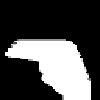

In [16]:
img = image.load_img('1.png',target_size = (100,100))
img

In [17]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [18]:
img=image.load_img("10.png")
detect(img)

1/1 [==============================] - 4s 4s/step
THE PREDICTED LETTER IS  I
